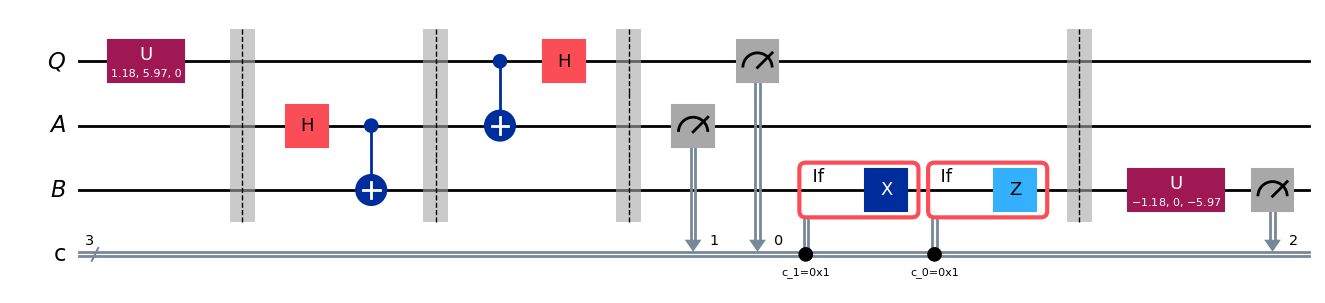

In [1]:
from qiskit import *
import random 
import numpy as np
from numpy import pi

# Registrar os qubits
secret = QuantumRegister(1,'Q')
Alice = QuantumRegister(1, 'A')
Bob = QuantumRegister(1, 'B')

# Registrar os bits clássicos
cr = ClassicalRegister(3 , 'c')

#Criação do circuito 
qc = QuantumCircuit(secret,Alice,Bob,cr)

#criando Unitária 
np.random.seed(42)
theta = np.random.uniform(0.0 , 1.0) *np.pi
varphi = np.random.uniform(0.0, 2.0)* np.pi
qc.u(theta,varphi, 0.0, secret)
qc.barrier()

#Porta hadamard em Alice
qc.h(Alice)

#Porta CNOT com controlador Alice e alvo Bob
qc.cx(Alice,Bob)
qc.barrier()

#Passar um porta CNOT, tem com controlador secret e alvo Alice
qc.cx(secret,Alice)

#Porta hadamard em secret
qc.h(secret)
qc.barrier()

#Medição de Alice 
qc.measure(Alice,cr[1])
qc.measure(secret,cr[0])

#Medição de Bob
with qc.if_test((cr[1], 1)):
    qc.x(Bob)
with qc.if_test((cr[0],1)):
    qc.z(Bob)
qc.barrier()
qc.u(theta, varphi, 0.0, Bob).inverse()
qc.measure(Bob,cr[2])
qc.draw(output='mpl')

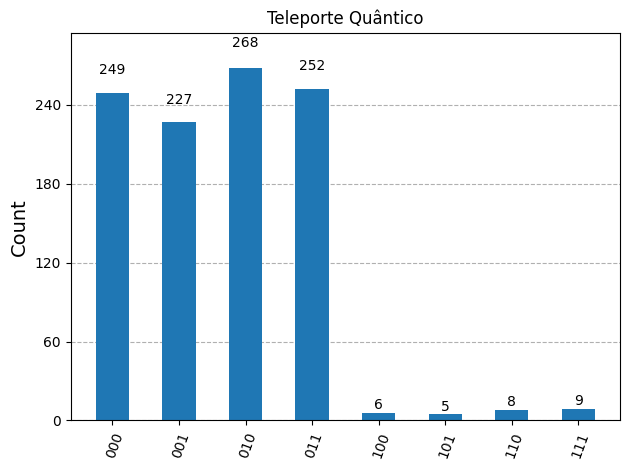

In [2]:
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime import QiskitRuntimeService

#Criando um simulador
simulator = AerSimulator()

#Chamar os serviços e obter os dados do Backend
service = QiskitRuntimeService()
backend = service.backend("ibm_brisbane")

#Armazenar os dados
noise_model = NoiseModel.from_backend(backend)

#Tranpilador 
transpile_teleport= transpile(qc,backend)

job = simulator.run(transpile_teleport).result()
job = simulator.run(transpile_teleport, noise_model=noise_model).result()
counts = job.get_counts(0)

plot_histogram(counts, title="Teleporte Quântico")
